In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [80]:
CEJE = pd.read_csv('./magazine/final/CEJE_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [81]:
CEJE['ADFN_2'] = CEJE['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [82]:
CEJE['ADFN_2']

0       [골드, 장식, 포인트, 준, 케이프, 체크, 코트, 백, 산드로, Sandro, ...
1            [빈티지, 한, 주름, 워싱, 특징, 데님, 팬츠, CELINE, CELINE]
2                  [대, 에스닉, 분위기, 물씬, CELINE, 방패, 모양, 숄더백]
3       [재킷, 셔츠, 슈즈, CELINE, CELINE, 블랙, 스커트, 렉토, 이어링,...
4       [재킷, 셔츠, 크리스, CELINE, CELINE, 팬츠, 다잉브, 리드, 슈즈,...
                              ...                        
1110    [서로, 팬임, 인증, 두, 스타, BLACKPINK, 세레나, 고메즈, 함께한, ...
1111    [내셔널, 아이스크림, 데이, 기념, BLACKPINK, 귀여운, 포스팅, 제니, ...
1112    [한국, 신진, 디자이너, 하이, 패션, 브랜드, 섭렵, 블핑, BLACKPINK,...
1113    [BLACKPINK, 로제, 리사, 지수, 솔로, 곡, 발매, 된다, 오는, 첫, ...
1114    [K, 팝, 그룹, 최초, BLACKPINK, 뚜두뚜두, DDU, DU, DDU, ...
Name: ADFN_2, Length: 1115, dtype: object

### top50 리스트 생성

In [83]:
top500 = pd.read_csv('./CEJE_top500.csv', sep='|', encoding = 'utf-8')

In [84]:
top500

,word,count
0,제니,9281
1,귀엽다,2144
2,예쁘다,1819
3,CELINE,1749
4,사랑,879
...,...,...
495,무,53
496,참고,53
497,끌로,53
498,심플,53


In [85]:
top30 = []
for i in range(30):
    top30.append(top500.loc[i, 'word'])
    
print(len(top30))
print(top30)

30
['제니', '귀엽다', '예쁘다', 'CELINE', '사랑', '얼굴', '패션', '브랜드', '컬렉션', '옷', '스타일', '매력', 'SLIMANE', 'HEDI', '룩', '무대', '노래', '컬러', 'CHANEL', '잘', '시즌', '아이돌', '디자이너', '백', '여자', '팬', '느낌', '여성', '가장', '젠득']


In [86]:
top50 = []
for i in range(50):
    top50.append(top500.loc[i, 'word'])
    
print(len(top50))
print(top50)

50
['제니', '귀엽다', '예쁘다', 'CELINE', '사랑', '얼굴', '패션', '브랜드', '컬렉션', '옷', '스타일', '매력', 'SLIMANE', 'HEDI', '룩', '무대', '노래', '컬러', 'CHANEL', '잘', '시즌', '아이돌', '디자이너', '백', '여자', '팬', '느낌', '여성', '가장', '젠득', '드레스', '눈', '팬츠', '쇼', '디자인', '대', '매치', '실력', '걸', '재킷', '모습', '남성', '영어', '장식', '머리', '아이템', '블랙', '지난', '처음', '모델']


### top100

In [87]:
top100 = []
for i in range(100):
    top100.append(top500.loc[i, 'word'])
    
print(len(top100))
print(top100)

100
['제니', '귀엽다', '예쁘다', 'CELINE', '사랑', '얼굴', '패션', '브랜드', '컬렉션', '옷', '스타일', '매력', 'SLIMANE', 'HEDI', '룩', '무대', '노래', '컬러', 'CHANEL', '잘', '시즌', '아이돌', '디자이너', '백', '여자', '팬', '느낌', '여성', '가장', '젠득', '드레스', '눈', '팬츠', '쇼', '디자인', '대', '매치', '실력', '걸', '재킷', '모습', '남성', '영어', '장식', '머리', '아이템', '블랙', '지난', '처음', '모델', '앞머리', '연출', '코트', '새로운', '파리', 'PHILO', '헤어', 'PHOEBE', '좋은', '분위기', '최고', '디렉터', '예능', '랩', '첫', '봄', '시작', '그룹', '스타일링', '춤', 'LAURENT', '포인트', '자체', 'SAINT', '표정', '복', '목소리', '완성', '멤버', '소재', '공주', '화이트', '라인', '위해', '많은', '발음', '고급', '연예인', '의상', '셔츠', '치마', '세상', '한국', '라이브', '스커트', '트렌드', '좋다', '대한', 'DIOR', '마음']


In [88]:
top200 = []
for i in range(200):
    top200.append(top500.loc[i, 'word'])
    
print(len(top200))
print(top200)

200
['제니', '귀엽다', '예쁘다', 'CELINE', '사랑', '얼굴', '패션', '브랜드', '컬렉션', '옷', '스타일', '매력', 'SLIMANE', 'HEDI', '룩', '무대', '노래', '컬러', 'CHANEL', '잘', '시즌', '아이돌', '디자이너', '백', '여자', '팬', '느낌', '여성', '가장', '젠득', '드레스', '눈', '팬츠', '쇼', '디자인', '대', '매치', '실력', '걸', '재킷', '모습', '남성', '영어', '장식', '머리', '아이템', '블랙', '지난', '처음', '모델', '앞머리', '연출', '코트', '새로운', '파리', 'PHILO', '헤어', 'PHOEBE', '좋은', '분위기', '최고', '디렉터', '예능', '랩', '첫', '봄', '시작', '그룹', '스타일링', '춤', 'LAURENT', '포인트', '자체', 'SAINT', '표정', '복', '목소리', '완성', '멤버', '소재', '공주', '화이트', '라인', '위해', '많은', '발음', '고급', '연예인', '의상', '셔츠', '치마', '세상', '한국', '라이브', '스커트', '트렌드', '좋다', '대한', 'DIOR', '마음', '레드', '이미지', '다양한', '최근', '데뷔', '데님', '로고', '선택', '입덕', '패턴', '스타', '인간', '세계', '크리에이티브', '여름', '클래식', '무드', '영국', '제일', '볼', '티', '시대', '영화', '실루엣', '가죽', '런웨이', '메이크업', '부츠', '버버리', '썸네일', '남자', '가방', '애기', '시크', '레전드', 'LVMH', '인기', '감', '키', '살', '공개', '액세서리', '외모', '활동', '톱', '쿠마', '트', '소화', '영감', '마지막', '미니', '가수', '솔로', '니트', '럭셔리', '선글라스', '손

In [89]:
top300 = []
for i in range(300):
    top300.append(top500.loc[i, 'word'])
    
print(len(top300))
print(top300)

300
['제니', '귀엽다', '예쁘다', 'CELINE', '사랑', '얼굴', '패션', '브랜드', '컬렉션', '옷', '스타일', '매력', 'SLIMANE', 'HEDI', '룩', '무대', '노래', '컬러', 'CHANEL', '잘', '시즌', '아이돌', '디자이너', '백', '여자', '팬', '느낌', '여성', '가장', '젠득', '드레스', '눈', '팬츠', '쇼', '디자인', '대', '매치', '실력', '걸', '재킷', '모습', '남성', '영어', '장식', '머리', '아이템', '블랙', '지난', '처음', '모델', '앞머리', '연출', '코트', '새로운', '파리', 'PHILO', '헤어', 'PHOEBE', '좋은', '분위기', '최고', '디렉터', '예능', '랩', '첫', '봄', '시작', '그룹', '스타일링', '춤', 'LAURENT', '포인트', '자체', 'SAINT', '표정', '복', '목소리', '완성', '멤버', '소재', '공주', '화이트', '라인', '위해', '많은', '발음', '고급', '연예인', '의상', '셔츠', '치마', '세상', '한국', '라이브', '스커트', '트렌드', '좋다', '대한', 'DIOR', '마음', '레드', '이미지', '다양한', '최근', '데뷔', '데님', '로고', '선택', '입덕', '패턴', '스타', '인간', '세계', '크리에이티브', '여름', '클래식', '무드', '영국', '제일', '볼', '티', '시대', '영화', '실루엣', '가죽', '런웨이', '메이크업', '부츠', '버버리', '썸네일', '남자', '가방', '애기', '시크', '레전드', 'LVMH', '인기', '감', '키', '살', '공개', '액세서리', '외모', '활동', '톱', '쿠마', '트', '소화', '영감', '마지막', '미니', '가수', '솔로', '니트', '럭셔리', '선글라스', '손

In [90]:
t500 = []
for i in range(500):
    t500.append(top500.loc[i, 'word'])
    
print(len(t500))
print(t500[:91])

500
['제니', '귀엽다', '예쁘다', 'CELINE', '사랑', '얼굴', '패션', '브랜드', '컬렉션', '옷', '스타일', '매력', 'SLIMANE', 'HEDI', '룩', '무대', '노래', '컬러', 'CHANEL', '잘', '시즌', '아이돌', '디자이너', '백', '여자', '팬', '느낌', '여성', '가장', '젠득', '드레스', '눈', '팬츠', '쇼', '디자인', '대', '매치', '실력', '걸', '재킷', '모습', '남성', '영어', '장식', '머리', '아이템', '블랙', '지난', '처음', '모델', '앞머리', '연출', '코트', '새로운', '파리', 'PHILO', '헤어', 'PHOEBE', '좋은', '분위기', '최고', '디렉터', '예능', '랩', '첫', '봄', '시작', '그룹', '스타일링', '춤', 'LAURENT', '포인트', '자체', 'SAINT', '표정', '복', '목소리', '완성', '멤버', '소재', '공주', '화이트', '라인', '위해', '많은', '발음', '고급', '연예인', '의상', '셔츠', '치마']


### top50만 남기기

In [91]:
len(CEJE)

1115

In [92]:
top30_word = []
for i in range(len(CEJE)):
    w=[]
    for word in CEJE.loc[i, 'ADFN_2']:
        if word in top30:
            w.append(word)
    top30_word.append(w)

In [93]:
top50_word = []
for i in range(len(CEJE)):
    w=[]
    for word in CEJE.loc[i, 'ADFN_2']:
        if word in top50:
            w.append(word)
    top50_word.append(w)

In [94]:
top100_word = []
for i in range(len(CEJE)):
    w=[]
    for word in CEJE.loc[i, 'ADFN_2']:
        if word in top100:
            w.append(word)
    top100_word.append(w)

In [95]:
top200_word = []
for i in range(len(CEJE)):
    w=[]
    for word in CEJE.loc[i, 'ADFN_2']:
        if word in top200:
            w.append(word)
    top200_word.append(w)

In [96]:
top300_word = []
for i in range(len(CEJE)):
    w=[]
    for word in CEJE.loc[i, 'ADFN_2']:
        if word in top300:
            w.append(word)
    top300_word.append(w)

In [97]:
top500_word = []
for i in range(len(CEJE)):
    w=[]
    for word in CEJE.loc[i, 'ADFN_2']:
        if word in t500:
            w.append(word)
    top500_word.append(w)

### 전체

In [98]:
CEJE

,magazine,brand,title,word,ADFN,ADFN_2
0,A,Ce,코트 체크,"골드 잠금 장식으로 포인트를 준 케이프 체크 코트는 1백9만원, 산드로(SANDRO...","['골드', '장식', '포인트', '준', '케이프', '체크', '코트', '백...","[골드, 장식, 포인트, 준, 케이프, 체크, 코트, 백, 산드로, Sandro, ..."
1,A,Ce,데님이여 영원하라,"빈티지한 주름과 워싱이 특징인 데님 팬츠는 가격미정, CELINE(CELINE).","['빈티', '한', '주름', '워싱', '특징', '데님', '팬츠', 'CEL...","[빈티지, 한, 주름, 워싱, 특징, 데님, 팬츠, CELINE, CELINE]"
2,A,Ce,남자 백’까지 갖고 싶어,1970년대 에스닉한 분위기가 물씬 풍기는 CELINE의 방패 모양 숄더백.,"['대', '에스', '닉', '분위기', '물씬', 'CELINE', '방패', ...","[대, 에스닉, 분위기, 물씬, CELINE, 방패, 모양, 숄더백]"
3,A,Ce,예림-예리,"재킷, 셔츠, 슈즈는 CELINE(CELINE), 블랙 스커트는 렉토, 이어링은 스...","['재킷', '셔츠', '슈즈', 'CELINE', 'CELINE', '블랙', '...","[재킷, 셔츠, 슈즈, CELINE, CELINE, 블랙, 스커트, 렉토, 이어링,..."
4,A,Ce,"GOOD TIME, 헨리","재킷, 셔츠, 네크리스는 모두 CELINE(CELINE), 팬츠는 다잉브리드, 슈즈...","['재킷', '셔츠', '크리스', 'CELINE', 'CELINE', '팬츠', ...","[재킷, 셔츠, 크리스, CELINE, CELINE, 팬츠, 다잉브, 리드, 슈즈,..."
...,...,...,...,...,...,...
1110,W,Je,"블랙핑크X세레나 고메즈 영상통화, 협업 티징","서로의 팬임을 인증한 두 스타, 8월 28일 BLACKPINK와 세레나 고메즈가 함...","['서로', '팬임', '인증', '두', '스타', 'BLACKPINK', '세레...","[서로, 팬임, 인증, 두, 스타, BLACKPINK, 세레나, 고메즈, 함께한, ..."
1111,W,Je,블랙핑크가 아이스크림 셀카를 올린 이유는?,"내셔널 아이스크림 데이’를 기념한 BLACKPINK의 귀여운 포스팅., 제니와 리사...","['내셔널', '아이스크림', '데이', '기념', 'BLACKPINK', '귀여운...","[내셔널, 아이스크림, 데이, 기념, BLACKPINK, 귀여운, 포스팅, 제니, ..."
1112,W,Je,블랙핑크 컴백! 남다른 패션 스타일링,"한국 신진 디자이너부터 하이 패션 브랜드까지 섭렵한 블핑, 6월 26일 드디어 BL...","['한국', '신진', '디자이너', '하이', '패션', '브랜드', '섭렵', ...","[한국, 신진, 디자이너, 하이, 패션, 브랜드, 섭렵, 블핑, BLACKPINK,..."
1113,W,Je,"블랙핑크 로제, 리사, 지수 솔로곡 공개한다","BLACKPINK 로제, 리사, 지수의 솔로곡이 발매된다., , 오는 9월 첫 정규...","['BLACKPINK', '로제', '리사', '지수', '솔로', '곡', '발매...","[BLACKPINK, 로제, 리사, 지수, 솔로, 곡, 발매, 된다, 오는, 첫, ..."


### item 남기기

In [23]:
item = ['백', '드레스', '재킷', '주얼리', '옷', '슈즈', '스커트', '링', '팬츠', '가방', '슈트', '향수', '의상', '데님', '액세서리', '톱',
'셔츠', '모자', '수트', '스니커즈', '니트', '시계', '워치', '핸드백', '벨트', '선글라스', '목걸이', '티셔츠', '쇼츠', '샌들',
 '귀고리', '워치', '코트', '부츠', '케이프']

In [24]:
# item_word = []
# for i in range(len(mag_je)):
#     w=[]
#     for word in mag_je.loc[i, 'ADFN']:
#         if word in item:
#             w.append(word)
#     item_word.append(w)

### top100이면서 item이 아닌 것

In [25]:
# top100_not_item_word = []
# for i in range(len(tot_je)):
#     w=[]
#     for word in tot_je.loc[i, 'ADFN']:
#         if word in top100:
#             if word not in item:
#                 w.append(word)
#     top100_not_item_word.append(w)

In [26]:
# len(top100_not_item_word)

In [27]:
# top100_not_item_word[1]

In [99]:
top50_word

[['장식', '백', '팬츠', '컬러', '백', '백', 'CELINE', 'CELINE', 'CELINE'],
 ['팬츠', 'CELINE', 'CELINE'],
 ['대', 'CELINE'],
 ['재킷', 'CELINE', 'CELINE', '블랙', '스타일'],
 ['재킷', 'CELINE', 'CELINE', '팬츠'],
 ['CELINE',
  '패션',
  '브랜드',
  '브랜드',
  '시즌',
  '브랜드',
  'CHANEL',
  'CELINE',
  '브랜드',
  '패션',
  '느낌',
  '브랜드',
  '브랜드',
  '브랜드',
  '브랜드'],
 ['백', '팬츠', 'CELINE', 'CELINE'],
 ['컬러', 'CHANEL', 'CHANEL', 'CELINE', 'CELINE'],
 ['CELINE', 'CELINE', '백', '대', '블랙', 'CELINE', '블랙', '컬러', '컬러', '재킷'],
 ['장식', '디자인', '장식', 'CELINE'],
 ['컬러', '디자인', '디자인', '장식', '장식', '컬러', '백', '백', 'CELINE', 'CELINE'],
 ['룩',
  '룩',
  '디자인',
  '패션',
  '사랑',
  '시즌',
  '디자이너',
  '시즌',
  '대',
  '패션',
  '대',
  '패션',
  '스타일',
  '룩',
  '여성',
  '가장',
  '장식',
  '옷',
  '여성',
  '룩',
  '드레스',
  '드레스',
  '룩',
  '룩',
  '여성',
  '머리',
  '장식',
  '머리',
  '장식',
  '시즌',
  '대',
  '패션',
  '컬렉션',
  '드레스',
  '매치',
  '장식',
  '브랜드',
  '드레스',
  '매치',
  '대',
  '패션',
  '장식',
  '매치',
  '여성',
  '모습',
  '매치',
  'CELINE',
  '장식',
  '대',
  '드레스',
  '장식',

In [100]:
len(top50_word)

1115

### 텍스트 한줄씩 읽어와 dataset에 기록

### 어프라이어리(Apriori) 알고리즘을 적용하여 연관규칙 분석 수행

In [30]:
# 어프라이어리(Apriori)
from apyori import apriori

In [31]:
top30_word[0]

['백', '컬러', '백', '백', 'CELINE', 'CELINE', 'CELINE']

In [101]:
# 지지도(support) : P(A∩B)
result = list(apriori(top500_word, min_support = 0.05))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) 
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)

,items,support,ordered_statistics,length
251,"(브랜드, CELINE)",0.206278,"[((), (브랜드, CELINE), 0.2062780269058296, 1.0),...",2
286,"(CELINE, 컬렉션)",0.205381,"[((), (CELINE, 컬렉션), 0.20538116591928252, 1.0)...",2
292,"(CELINE, 패션)",0.189238,"[((), (CELINE, 패션), 0.18923766816143497, 1.0),...",2
267,"(시즌, CELINE)",0.178475,"[((), (시즌, CELINE), 0.17847533632286997, 1.0),...",2
231,"(CELINE, 디자이너)",0.167713,"[((), (CELINE, 디자이너), 0.16771300448430493, 1.0...",2
304,"(HEDI, SLIMANE)",0.161435,"[((), (HEDI, SLIMANE), 0.16143497757847533, 1....",2
209,"(HEDI, CELINE)",0.160538,"[((), (CELINE, HEDI), 0.16053811659192826, 1.0...",2
215,"(CELINE, SLIMANE)",0.160538,"[((), (CELINE, SLIMANE), 0.16053811659192826, ...",2
237,"(CELINE, 룩)",0.158744,"[((), (CELINE, 룩), 0.15874439461883408, 1.0), ...",2
261,"(스타일, CELINE)",0.141704,"[((), (스타일, CELINE), 0.14170403587443947, 1.0)...",2


In [126]:
for item in df['items']:
    if '제니' in item:
        print(item)

frozenset({'제니', '스타일'})
frozenset({'제니', '패션'})
frozenset({'제니', '매력'})
frozenset({'제니', 'CHANEL'})
frozenset({'제니', '룩'})
frozenset({'제니', '포인트'})
frozenset({'제니', '사랑'})
frozenset({'제니', '매치'})
frozenset({'제니', '컬러'})
frozenset({'제니', '모습'})
frozenset({'제니', '얼굴'})
frozenset({'제니', '연출'})
frozenset({'제니', '블랙'})
frozenset({'제니', '잘'})
frozenset({'제니', '분위기'})
frozenset({'제니', '완성'})
frozenset({'제니', '느낌'})
frozenset({'제니', '팬'})
frozenset({'제니', '무대'})
frozenset({'제니', '눈'})
frozenset({'제니', '브랜드'})
frozenset({'제니', '멤버'})
frozenset({'제니', '예쁘다'})
frozenset({'제니', '머리'})
frozenset({'제니', '아이돌'})
frozenset({'제니', '소화'})
frozenset({'제니', '가장'})
frozenset({'제니', '스타일링'})
frozenset({'제니', '헤어'})


In [125]:
df[df['items'] == {'제니'}]

,items,support,ordered_statistics,length


### networkx 그래프 정의

In [103]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [104]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [105]:
pos = nx.spring_layout(G)

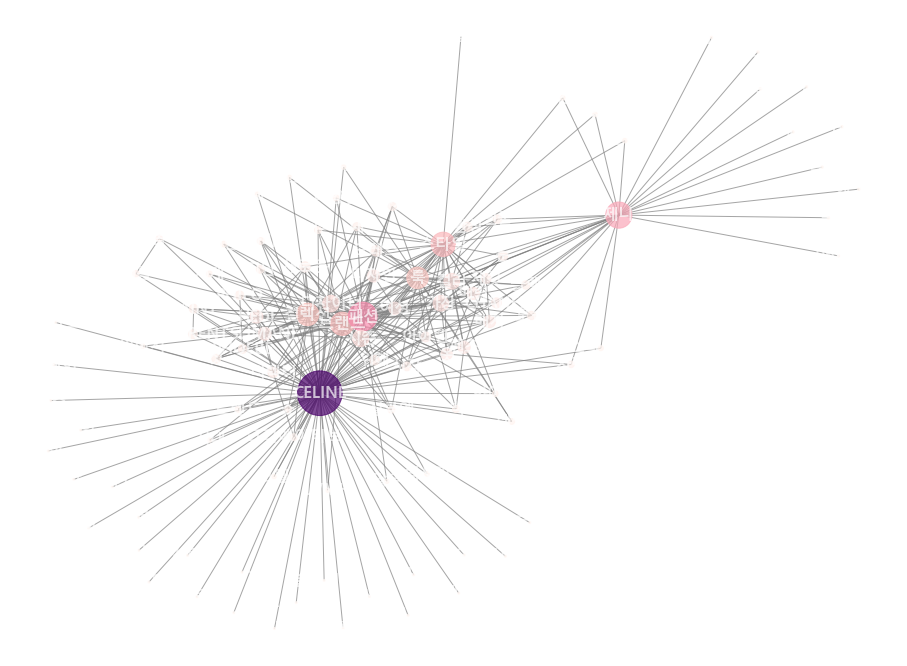

In [122]:
plt.figure(figsize = (16, 12)) ; plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap = plt.cm.RdPu,
                font_color = 'white', font_weight = 'bold')

plt.savefig('./nt_CEJE_top500_mis05.png', bbox_inches = 'tight')
plt.show()


In [31]:
# ['첫', '처음', '공개', '작업', '이후', '펜디', '판매', '작품', '드', '예정', '시대']